IMPORTING LIBRARIES

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

READING DATASET

In [57]:
#Dataset link: https://drive.google.com/file/d/1I9jGDxfk8jk34JTsBYU_-UvNy6kPTuRI/view?usp=drive_link
df=pd.read_csv("Analysis of Super Store - DA.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


LIST OF COLUMNS

In [58]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Check if there are any missing values

In [59]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

DROPPING UNNECESSARY COLUMNS

Postal code column is not necessary for analysis

In [60]:
df.drop(columns="Postal Code",inplace=True)
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Removing country column

In [61]:
df.drop(columns="Country",inplace=True)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


LIST OF UNIQUE VALUES

In [62]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["City"].unique())
print(df["State"].unique())
print(df["Region"].unique())
print(df["Category"].unique())
print(df["Sub-Category"].unique())
print(df["Quantity"].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Morristown' 'Cincinnati' 'Inglewood' 'Tamarac' 'Colorad

ABOUT THE DATA

In [63]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Region        9994 non-null   object 
 5   Category      9994 non-null   object 
 6   Sub-Category  9994 non-null   object 
 7   Sales         9994 non-null   float64
 8   Quantity      9994 non-null   int64  
 9   Discount      9994 non-null   float64
 10  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 859.0+ KB


DATA ANALYSIS

1. Sales and Profit based on region

array([<Axes: title={'center': 'Sales'}, xlabel='Region'>,
       <Axes: title={'center': 'Profit'}, xlabel='Region'>], dtype=object)

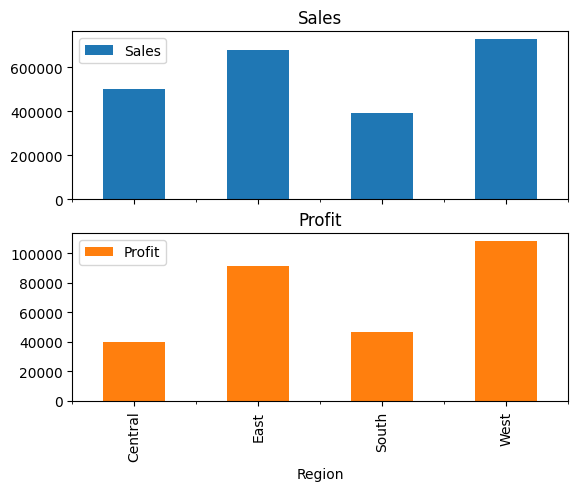

In [65]:
df.groupby("Region")[["Sales","Profit"]].sum().plot.bar(subplots=True)
               

2. Share of each region in sales

<Axes: ylabel='Sales'>

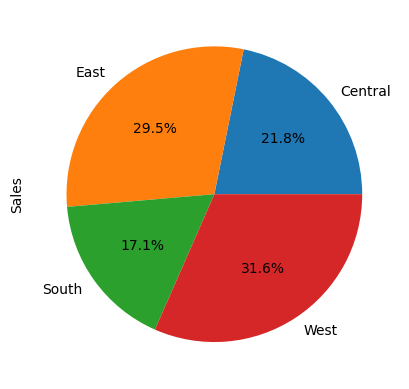

In [66]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.1f%%")

3. Share of each region in profit

<Axes: ylabel='Profit'>

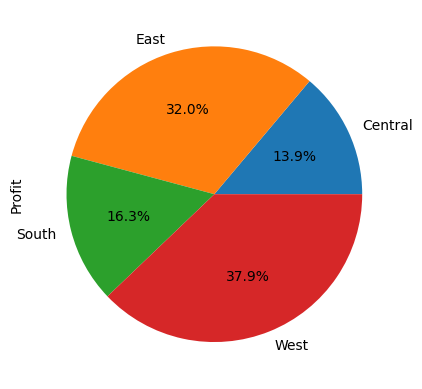

In [67]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.1f%%")

4. Count per region

Text(0, 0.5, 'Count')

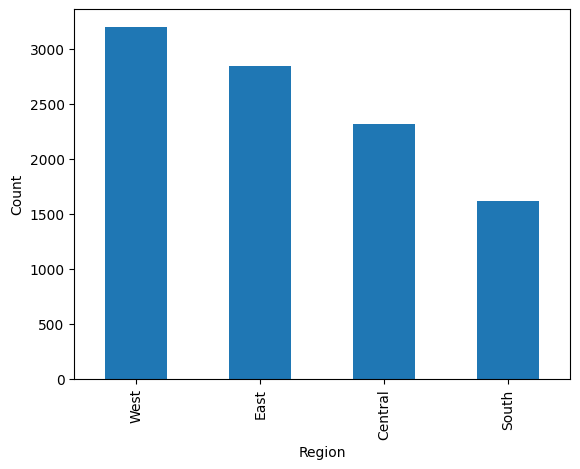

In [68]:
df["Region"].value_counts().plot.bar()     
plt.ylabel("Count")

5. Share of customers in each segment

<Axes: ylabel='count'>

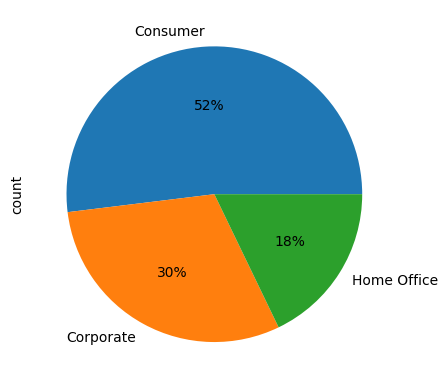

In [69]:
df["Segment"].value_counts().plot.pie(autopct="%1.0f%%")

6. Sales and profit in each segment

array([<Axes: title={'center': 'Sales'}, xlabel='Segment'>,
       <Axes: title={'center': 'Profit'}, xlabel='Segment'>], dtype=object)

<Figure size 2000x1000 with 0 Axes>

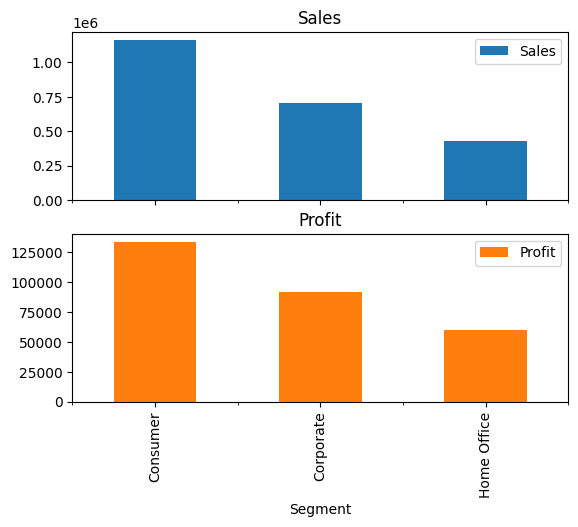

In [70]:
plt.figure(figsize=(20,10))
df.groupby("Segment")[["Sales","Profit"]].sum().plot.bar(subplots=True)

7. Share of each segment in Sales

<Axes: ylabel='Sales'>

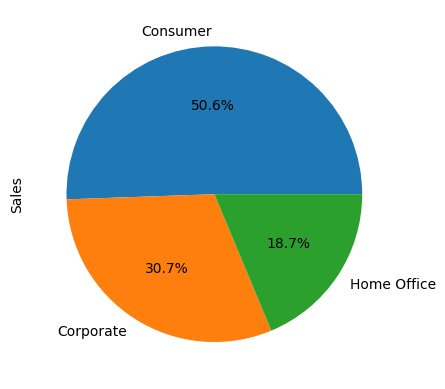

In [71]:
df.groupby("Segment")["Sales"].sum().plot.pie(autopct="%1.1f%%")

8. Share of each segment in Profit

<Axes: ylabel='Profit'>

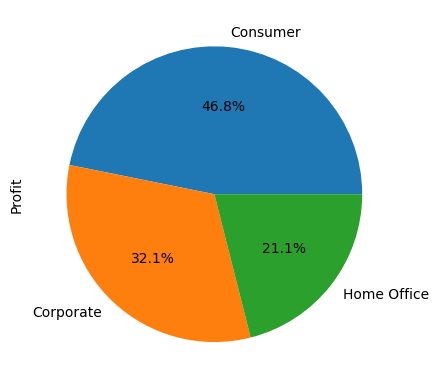

In [72]:
df.groupby("Segment")["Profit"].sum().plot.pie(autopct="%1.1f%%")

9. Sales and profit in each category

array([<Axes: title={'center': 'Sales'}, xlabel='Category'>,
       <Axes: title={'center': 'Profit'}, xlabel='Category'>],
      dtype=object)

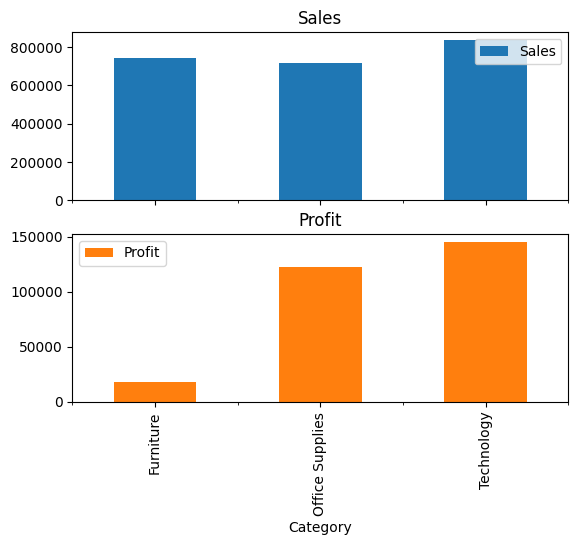

In [73]:
df.groupby("Category")[["Sales","Profit"]].sum().plot.bar(subplots=True)

10. Share of each category in sales

<Axes: ylabel='Sales'>

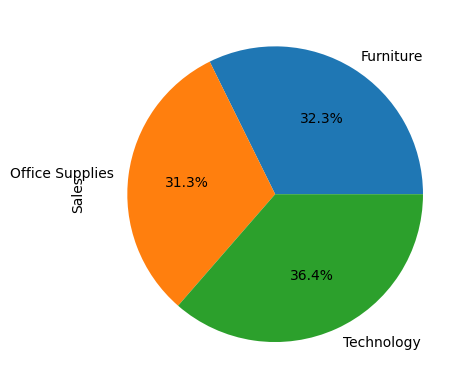

In [74]:
df.groupby("Category")["Sales"].sum().plot.pie(autopct="%1.1f%%")

12. Share of each category in profit

<Axes: ylabel='Profit'>

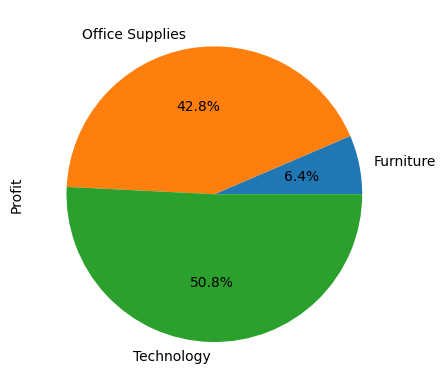

In [75]:
df.groupby("Category")["Profit"].sum().plot.pie(autopct="%1.1f%%")

13. Total quantity of items sold in each state

<Axes: xlabel='State'>

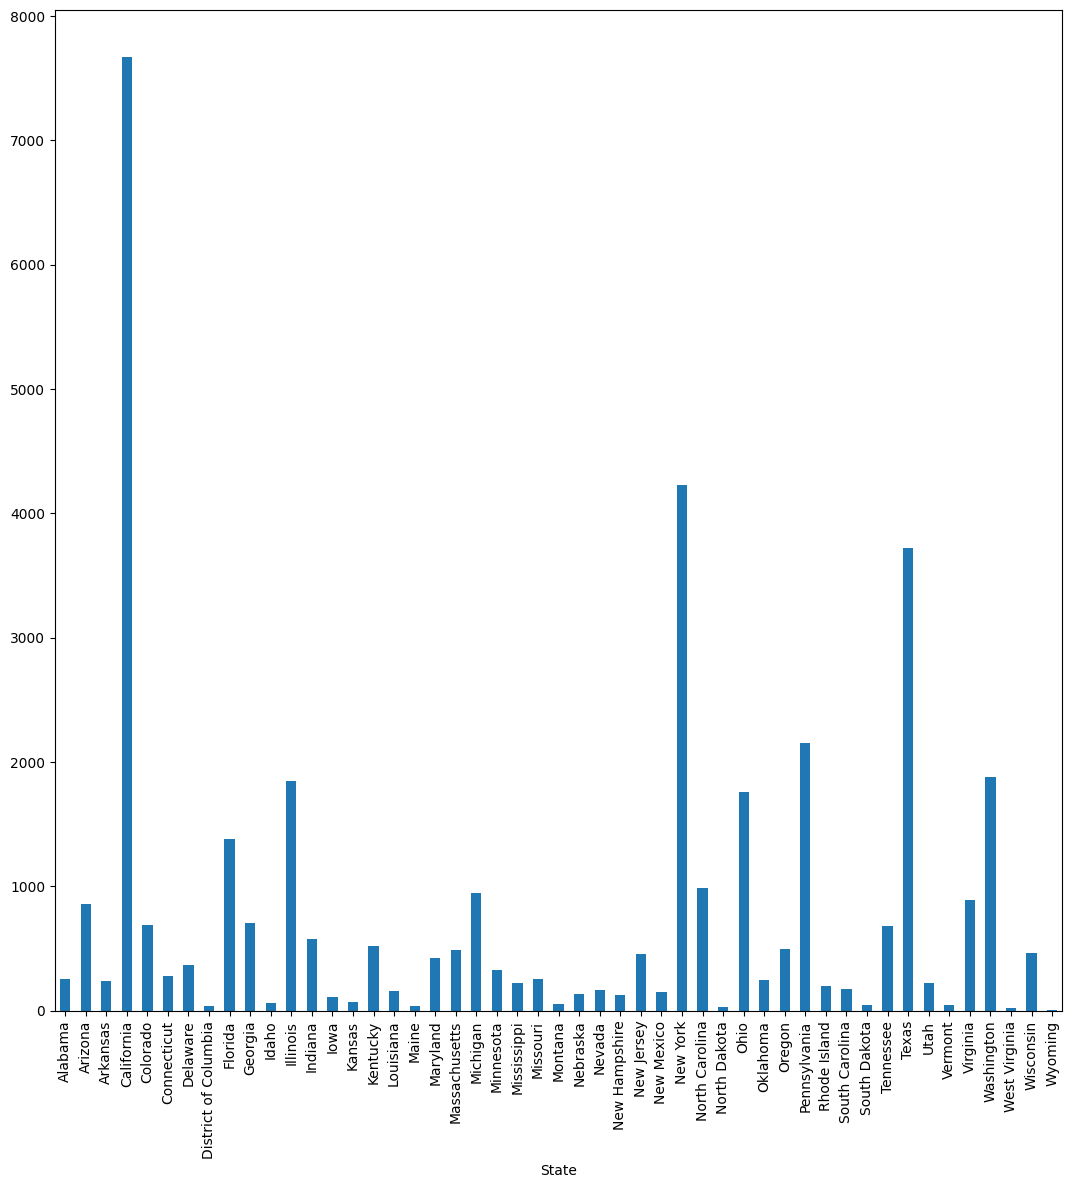

In [76]:
plt.figure(figsize=(13,13))
df.groupby("State")["Quantity"].sum().plot.bar()

14. Sales in each state

<Axes: xlabel='State'>

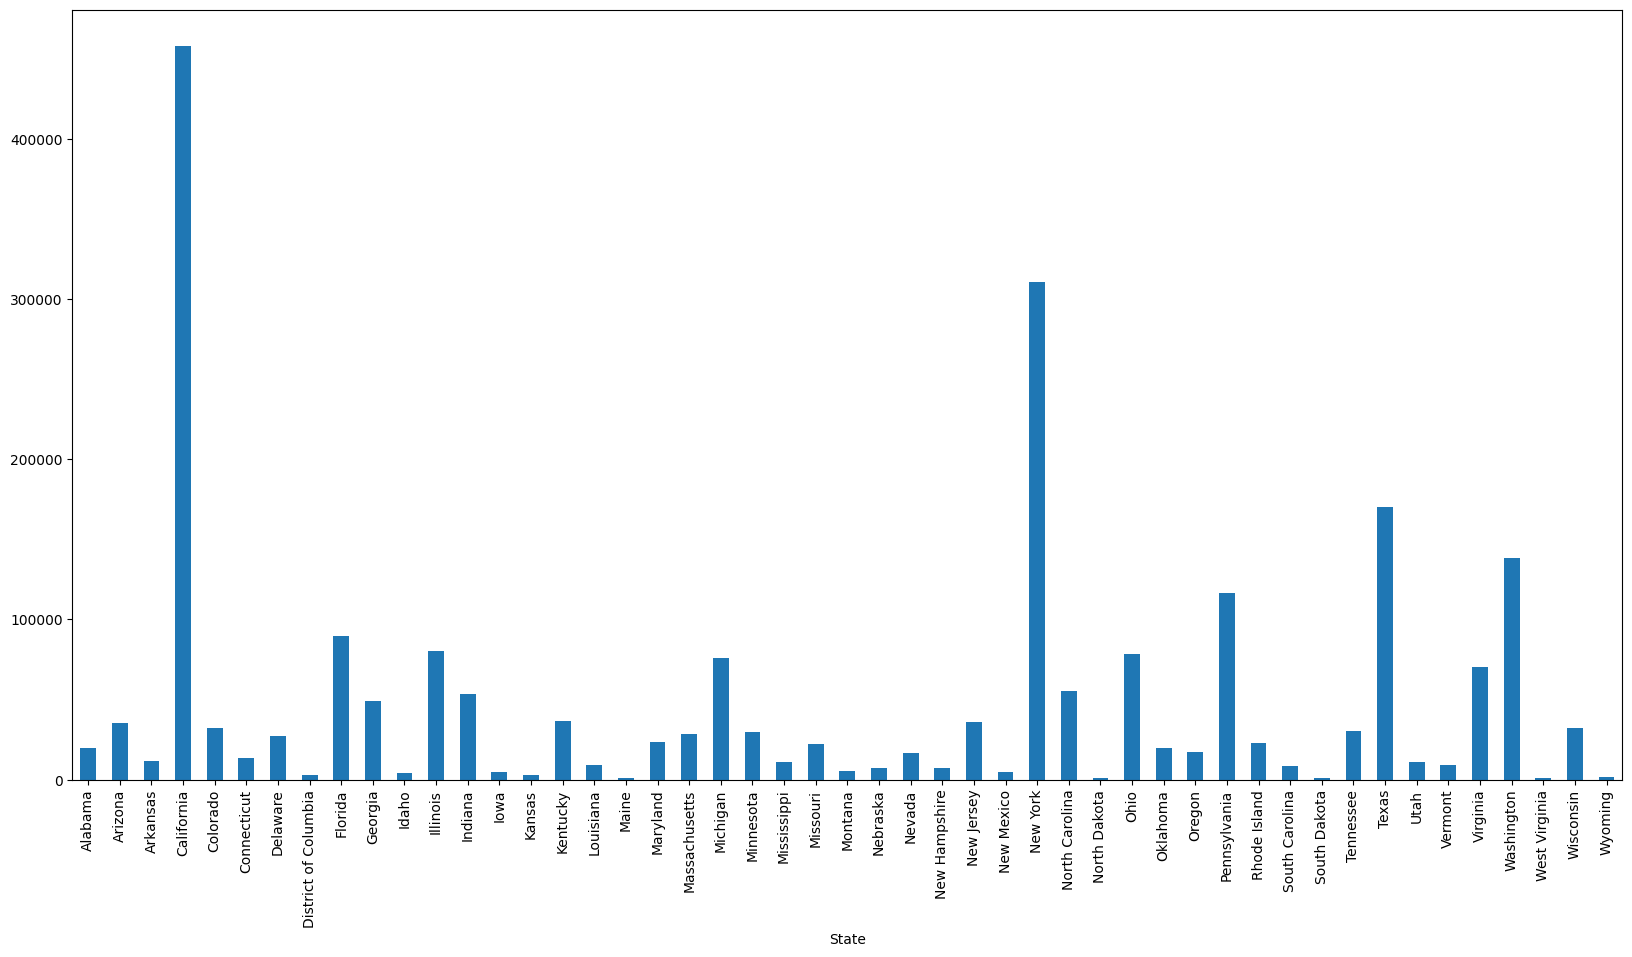

In [77]:

plt.figure(figsize=(20,10))
df.groupby("State")["Sales"].sum().plot.bar()


15. Sales, discount, and profit in each state

array([<Axes: title={'center': 'Profit'}, xlabel='State'>,
       <Axes: title={'center': 'Discount'}, xlabel='State'>,
       <Axes: title={'center': 'Sales'}, xlabel='State'>], dtype=object)

<Figure size 2000x1000 with 0 Axes>

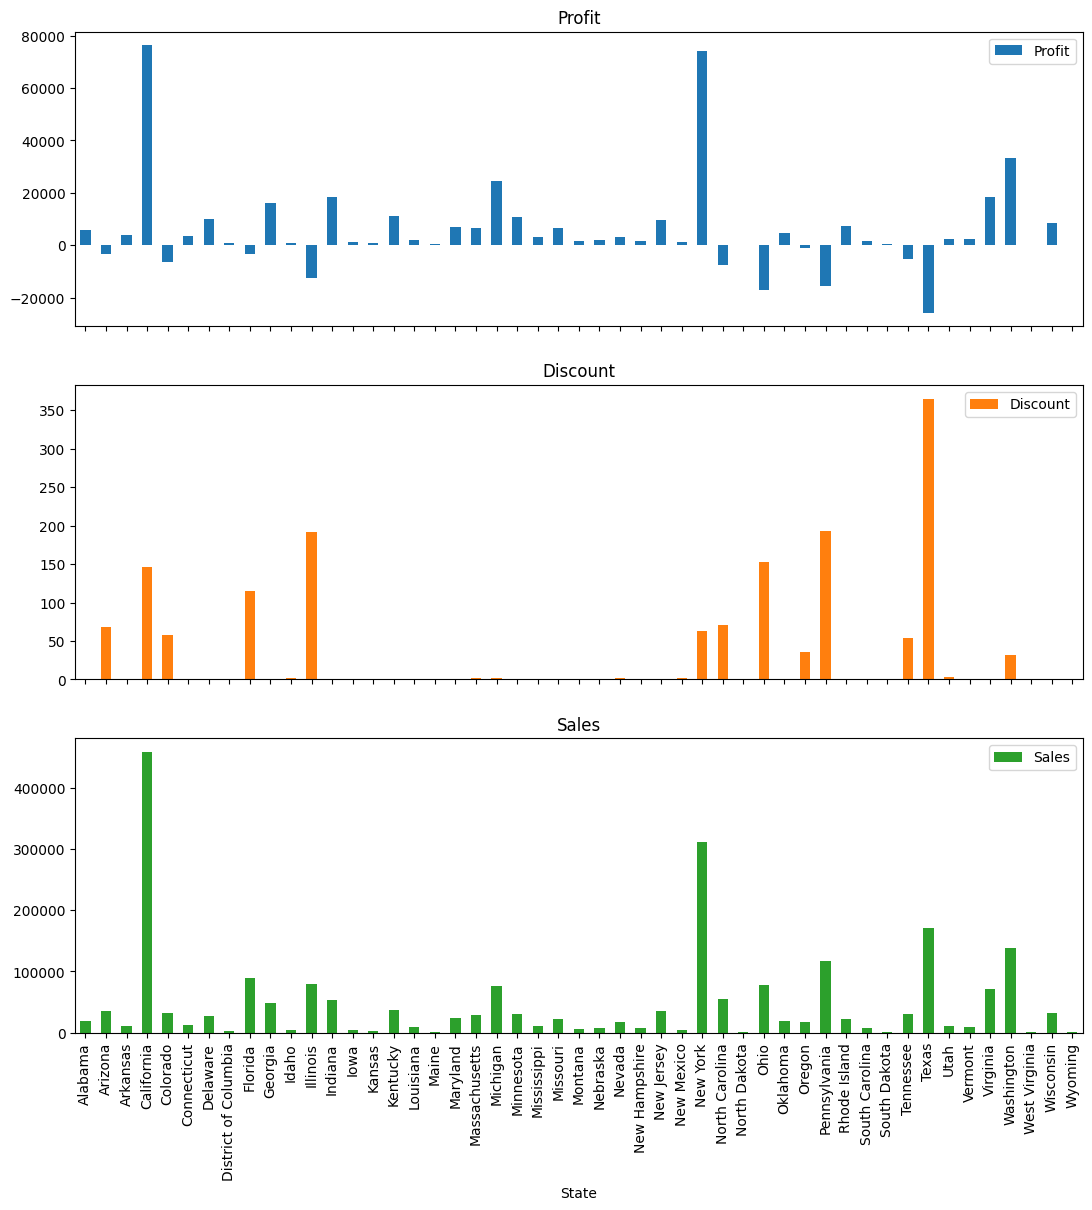

In [78]:
plt.figure(figsize=(20,10))
df.groupby("State")[["Profit","Discount","Sales"]].sum().plot.bar(subplots=True,figsize=(13,13))

16. Total quantity of items sold in each Sub-Category

<Axes: xlabel='Sub-Category', ylabel='Quantity'>

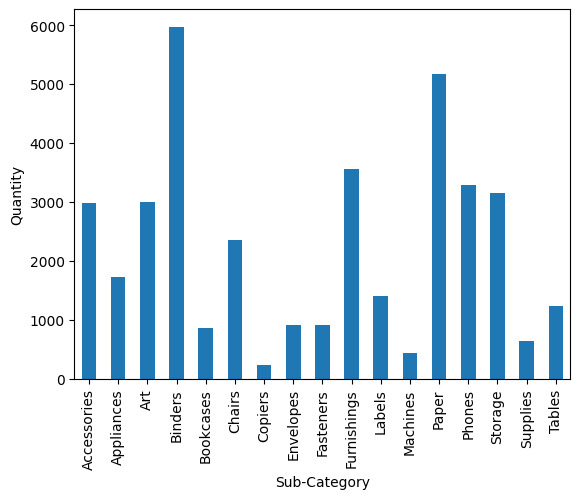

In [79]:
plt.ylabel("Quantity")
df.groupby("Sub-Category")["Quantity"].sum().plot.bar()

17. Sales, profit amd discount in each Sub-Category

array([<Axes: title={'center': 'Profit'}, xlabel='Sub-Category'>,
       <Axes: title={'center': 'Discount'}, xlabel='Sub-Category'>,
       <Axes: title={'center': 'Sales'}, xlabel='Sub-Category'>],
      dtype=object)

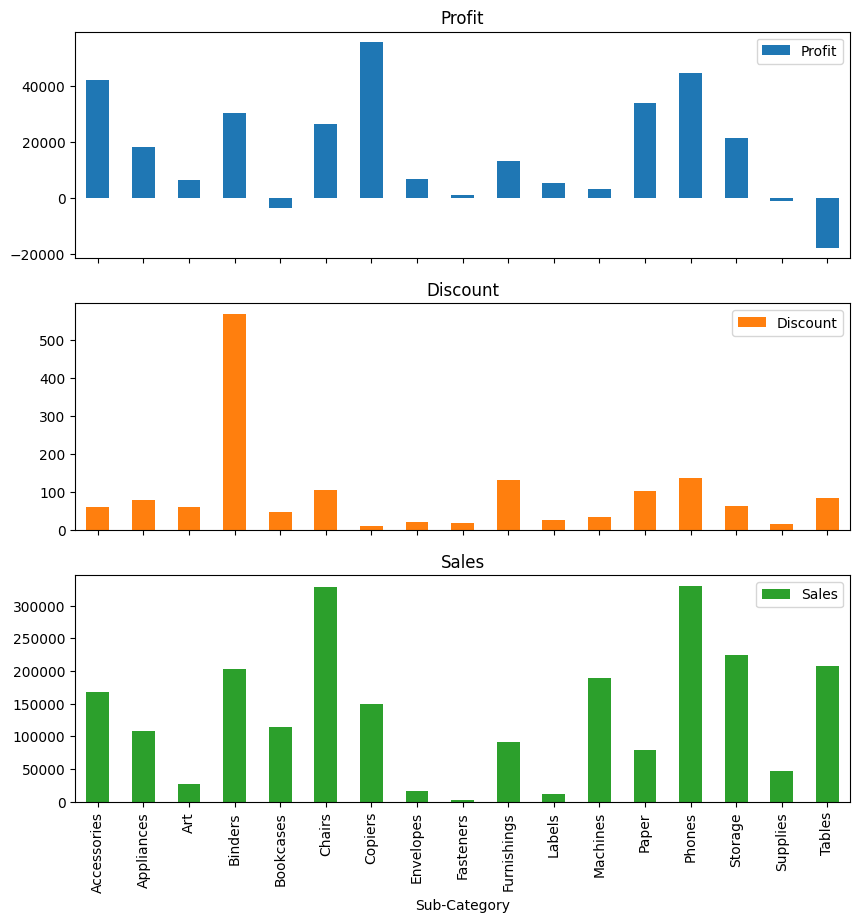

In [80]:
df.groupby("Sub-Category")[["Profit","Discount","Sales"]].sum().plot.bar(subplots=True,figsize=(10,10))

18. Count per Ship Mode

<Axes: xlabel='Ship Mode', ylabel='Count'>

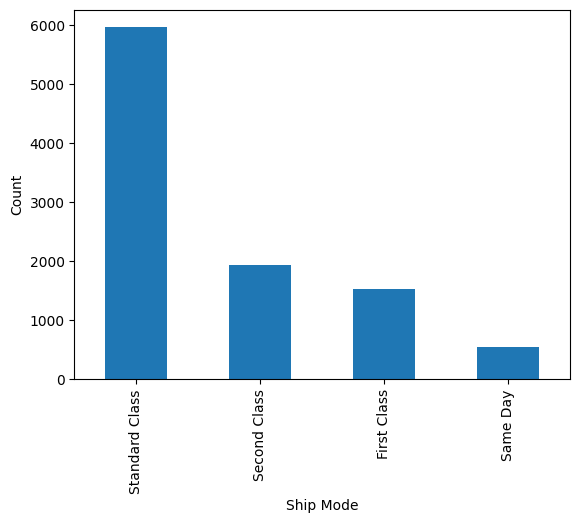

In [81]:
plt.ylabel("Count")
df["Ship Mode"].value_counts().plot.bar()

19. Overall Sales, discount, and profit

In [82]:
print(df["Profit"].sum())
print(df["Discount"].sum())
print(df["Sales"].sum())

286397.0217
1561.09
2297200.8603000003
